In [2]:
%pwd
%cd "/home/dutta/Downloads/Summer'24/Parts"

/home/dutta/Downloads/Summer'24/Parts


In [3]:
import json

# Read the gaiaedr3_to_plates_selected.txt file to obtain source_ids
# with open('gaiaedr3_to_plates_selected.txt', 'r') as file:
with open('gaiaedr3_to_plates.txt', 'r') as file:
    gaiaedr3_to_plates = json.load(file)

# Extract source_ids from gaiaedr3_to_plates dictionary
source_ids = [entry['source_id'] for entries in gaiaedr3_to_plates.values() for entry in entries]

In [4]:
len(source_ids)

2245129

In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load gaiaedr3_to_plates.txt file
with open('gaiaedr3_to_plates.txt', 'r') as file:
    gaia_to_plates_data = json.load(file)

valid_gaia_ids = set(gaia_to_plates_data.keys())

# Load data from the files
with open('source_calib_info_combined.txt', 'r') as file:
    source_data = json.load(file)

# with open('unique_plate_details_selected.txt', 'r') as file:
#     plate_data = json.load(file)

# Convert source_data to DataFrame
source_df = pd.DataFrame.from_dict(source_data, orient='index')
# plate_df = pd.DataFrame(plate_data)

# Filter plate data for non-NaN 'date_orig' and 'plate_id'
# filtered_plate_df = plate_df[(~plate_df['date_orig'].isna()) & (~plate_df['plate_id'].isna())].copy()

# Filter stars with non-zero Gaia IDs and non-NaN bpmag and rpmag
filtered_df = source_df[(source_df['gaiaedr3_id'] != 0) & 
                        (~source_df['bpmag'].isna()) & 
                        (~source_df['rpmag'].isna()) &
                        (~source_df['natmag'].isna())].copy()

# Compute BP-RP color and BP-RP error, and Absolute Magnitude (G-band)
filtered_df.loc[:, 'bp_rp_color'] = filtered_df['bpmag'] - filtered_df['rpmag']
filtered_df.loc[:, 'bp_rp_error'] = filtered_df['bpmag_error'] + filtered_df['rpmag_error']
# filtered_df.loc[:, 'abs_mag_g'] = filtered_df['gaiaedr3_gmag']

# # Drop rows with NaN or infinite values in bp_rp_color, bp_rp_error, and abs_mag_g
# filtered_df = filtered_df[np.isfinite(filtered_df['bp_rp_color']) & 
#                           np.isfinite(filtered_df['bp_rp_error']) & 
#                           np.isfinite(filtered_df['abs_mag_g'])]

# # Merge filtered data with plate data on 'phot_calib_flags' and 'plate_id'
filtered_df = filtered_df.reset_index().rename(columns={'index': 'source_id'})
# filtered_df = pd.merge(filtered_df, filtered_plate_df, how='left', left_on='phot_calib_flags', right_on='plate_id')

# print(filtered_df)

# Filter for rows by required conditions
final_df = filtered_df[(filtered_df['phot_calib_flags'] == 1) &
                       (~filtered_df['bp_rp_color'].isna()) & 
                       (~filtered_df['bp_rp_error'].isna()) &
                       (~filtered_df['airmass'].isna())]

# print(final_df)

# Filter final_df to keep only rows with gaiaedr3_id in valid_gaia_ids
# final_df = final_df[final_df['gaiaedr3_id'].astype(float).isin(valid_gaia_ids)]
# Convert gaiaedr3_id from float to string
final_df.loc[:, 'gaiaedr3_id'] = final_df['gaiaedr3_id'].apply(lambda x: format(x, '.0f'))
final_df = final_df.reset_index().rename(columns={'index': 'source_id_new'})
print(final_df)

# Select only the required columns
final_df = final_df[['source_id', 'gaiaedr3_id', 'bpmag', 'bpmag_error', 'rpmag', 'rpmag_error', 
                     'bp_rp_color', 'bp_rp_error', 'natmag', 'natmag_error', 'phot_calib_flags', 'gaiaedr3_dist']]

        source_id_new       source_id          gaiaedr3_id     bpmag  \
0                   0  41051780007379  1138483405106413824  8.531367   
1                   1  41052100006333  1138483405106413824  8.660066   
2                   2  41052140005670  1138483405106413824  8.454573   
3                   3  41052180006043  1138483405106413824  8.606135   
4                   4  41052220006575  1138483405106413824  8.549752   
...               ...             ...                  ...       ...   
586762        1041685  41051380004798  1138483405106413824  8.555377   
586763        1041686  41051420006329  1138483405106413824  8.690795   
586764        1041687  41051460006786  1138483405106413824  8.601176   
586765        1041688  41051740007354  1138483405106413824  8.586423   
586766        1041689  41051820005476  1138483405106413824  8.487808   

        bpmag_error     rpmag  rpmag_error    natmag  natmag_error  \
0          0.338294  7.364037     0.338294  9.027042      0.33823

In [7]:
final_df

source_id          gaiaedr3_id     bpmag  bpmag_error     rpmag  \
0       41051780007379  1138483405106413824  8.531367     0.338294  7.364037   
1       41052100006333  1138483405106413824  8.660066     0.301704  7.492735   
2       41052140005670  1138483405106413824  8.454573     0.314775  7.287242   
3       41052180006043  1138483405106413824  8.606135     0.347251  7.438806   
4       41052220006575  1138483405106413824  8.549752     0.301148  7.382422   
...                ...                  ...       ...          ...       ...   
586762  41051380004798  1138483405106413824  8.555377     0.315150  7.388046   
586763  41051420006329  1138483405106413824  8.690795     0.328412  7.523465   
586764  41051460006786  1138483405106413824  8.601176     0.324958  7.433846   
586765  41051740007354  1138483405106413824  8.586423     0.300130  7.419093   
586766  41051820005476  1138483405106413824  8.487808     0.313623  7.320478   

        rpmag_error  bp_rp_color  bp_rp_error    natmag  natmag_error  \
0          0.338294     1.167330     0.676588  9.027042      0.338230   
1          0.301704     1.167330     0.603408  9.207253      0.301591   
2          0.314775     1.167331     0.629550  9.008924      0.314680   
3          0.347251     1.167330     0.694503  9.192657      0.347189   
4          0.301148     1.167330     0.602296  9.190069      0.301028   
...             ...          ...          ...       ...           ...   
586762     0.315150     1.167331     0.630299  9.114492      0.315049   
586763     0.328412     1.167330     0.656824  9.305623      0.328306   
586764     0.324958     1.167330     0.649915  9.209794      0.324877   
586765     0.300130     1.167330     0.600261  9.175466      0.300016   
586766     0.313623     1.167330     0.627246  9.123216      0.313547   

        phot_calib_flags  gaiaedr3_dist  
0                      1       0.766233  
1                      1       0.964121  
2                      1       0.823998  
3                      1       0.644532  
4                      1       0.484041  
...                  ...            ...  
586762                 1       0.448654  
586763                 1       1.230776  
586764                 1       0.814242  
586765                 1       4.215703  
586766                 1       0.986385  

[586767 rows x 12 columns]

In [8]:
# Group by 'gaiaedr3_id' and get the row with the minimum 'bp_rp_error' for each group
unique_df = final_df.loc[final_df.groupby('gaiaedr3_id')['bp_rp_error'].idxmin()]

# Reset the index if desired
unique_df = unique_df.reset_index(drop=True)

In [9]:
unique_df

source_id          gaiaedr3_id      bpmag  bpmag_error      rpmag  \
0     40421210023481   100049858706696192   9.764114     0.054931   8.773259   
1     40522390006215  1000535278967260416  10.601284     0.095162   9.611947   
2     40955210034743  1000535377750476032  10.421885     0.253780   9.738286   
3     40421470089067   100132734395672832   6.737507     0.067104   5.716557   
4     40522020007997  1001390595935492736   7.035085     0.048900   5.935895   
...              ...                  ...        ...          ...        ...   
4952  40617860004628   995762333350851712   5.255261     0.065303   4.655734   
4953  40976860025065   995762539509165056   9.820695     0.206302   8.514565   
4954  40401620075772   996211788793402240  11.498356     0.115699  10.426496   
4955  40051490024359    99729621649560832  10.102448     0.111143   8.897497   
4956  40616590001112   998803372058426624   9.756839     0.103538   8.940477   

      rpmag_error  bp_rp_color  bp_rp_error     natmag  natmag_error  \
0        0.054931     0.990855     0.109862  10.433859      0.053680   
1        0.095162     0.989337     0.190325  10.336185      0.093794   
2        0.253780     0.683599     0.507560  10.940883      0.253715   
3        0.067104     1.020950     0.134209   7.440053      0.065654   
4        0.048900     1.099190     0.097799   6.781119      0.042328   
...           ...          ...          ...        ...           ...   
4952     0.065303     0.599527     0.130606   5.690925      0.063965   
4953     0.206302     1.306129     0.412603   8.953303      0.206301   
4954     0.115699     1.071860     0.231399  12.169344      0.114948   
4955     0.111143     1.204950     0.222285  10.676562      0.108976   
4956     0.103538     0.816361     0.207076  10.554313      0.094602   

      phot_calib_flags  gaiaedr3_dist  
0                    1       0.690778  
1                    1       0.052666  
2                    1      22.897800  
3                    1       0.219369  
4                    1       1.740034  
...                ...            ...  
4952                 1       0.498915  
4953                 1      13.012360  
4954                 1       0.085453  
4955                 1       1.322064  
4956                 1       0.528345  

[4957 rows x 12 columns]

In [10]:
# Print rows where 'natmag' is less than 8
rows_to_delete = unique_df[unique_df['natmag'] < 8]
print("Rows with 'natmag' less than 8:")
print(rows_to_delete)

# Delete rows where 'natmag' is less than 8
unique_df = unique_df[unique_df['natmag'] >= 8]

Rows with 'natmag' less than 8:
           source_id          gaiaedr3_id     bpmag  bpmag_error     rpmag  \
3     40421470089067   100132734395672832  6.737507     0.067104  5.716557   
4     40522020007997  1001390595935492736  7.035085     0.048900  5.935895   
18    40621850006840  1012629082238847872  5.320335     0.046401  4.696863   
29    40410140006800  1019198939093301376  5.848836     0.026879  4.853378   
38    40406820062561  1027292203666419328  8.457450     0.039577  7.573311   
...              ...                  ...       ...          ...       ...   
4867  40381570034866   944602813224534528  8.121903     0.086922  6.949803   
4876  40974680031456   951278974813543936 -2.519964     0.623541 -3.716814   
4887  40556210002341   957207580165891072  7.381123     0.136247  6.395622   
4894  41013690024122   961133897532561408  7.854565     0.430341  7.073119   
4952  40617860004628   995762333350851712  5.255261     0.065303  4.655734   

      rpmag_error  bp_rp_color 

In [11]:
# Print rows where 'natmag' is greater than 14
rows_to_delete = unique_df[unique_df['natmag'] > 14]
print("Rows with 'natmag' greater than 14:")
print(rows_to_delete)

# Delete rows where 'natmag' is greater than 14
unique_df = unique_df[unique_df['natmag'] <= 14]

Rows with 'natmag' greater than 14:
           source_id          gaiaedr3_id         bpmag  bpmag_error  \
245   40958390010554  1207328780219357184     14.699759     0.293770   
263   40958390023791  1221235265850060288     14.482211     0.268213   
270   40356600040542   122311876793326336     13.787766     0.153372   
305   40958390034178  1274405758382645760     14.563825     0.280041   
577   41041300004554   152755219167942656     12.775368     0.257237   
578   40066880092306   152755219172105984     12.971160     0.171796   
586   40061200024821   153563879905776384     13.658665     0.177460   
588   40061200039773   154004745411908864     13.124319     0.166474   
625   40352250012206   158053181585826304     13.439288     0.165913   
634   40412460016717   158647983015994496     12.890089     0.133762   
638   40352250015488   158974228731792128     12.864950     0.152654   
657   40412470004646   161182563476451072     12.978235     0.139233   
806   41020290025598  171813

In [12]:
# Save the DataFrame to a .txt file
unique_df.to_csv('unique_df.txt', sep='\t', index=False)

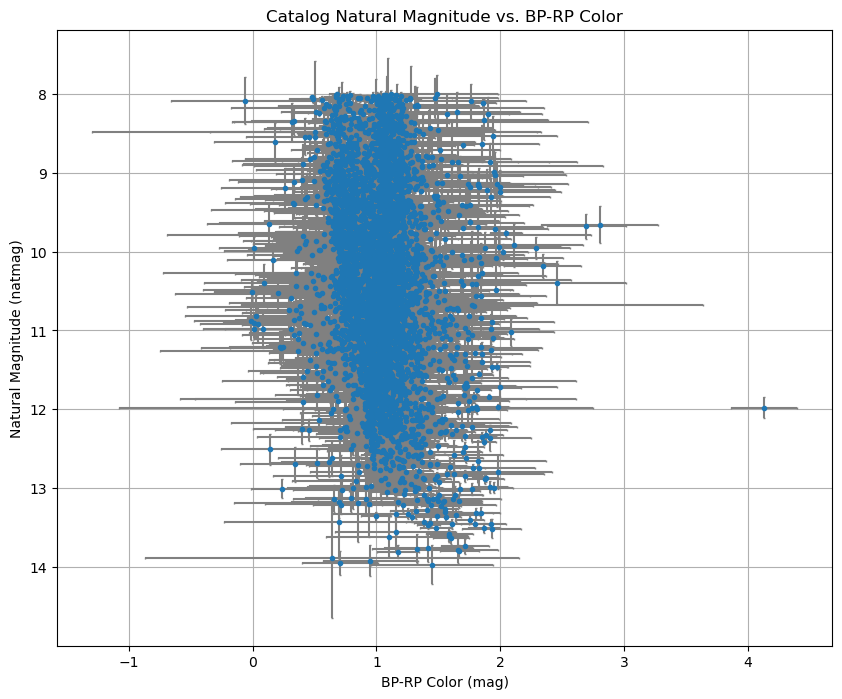

In [13]:
# Plot the data: 'bp_rp_color' on y-axis and 'natmag' on x-axis with 'bp_rp_error' as error bars
plt.figure(figsize=(10, 8))
# plt.scatter(unique_df['bp_rp_color'], unique_df['natmag'], s=5)
plt.errorbar(unique_df['bp_rp_color'], unique_df['natmag'], 
             xerr=unique_df['bp_rp_error']/2, yerr=np.abs(unique_df['natmag_error'])/2,
             fmt='.', ecolor='grey', capsize=1)

# Customize the plot
plt.gca().invert_yaxis()
plt.ylabel('Natural Magnitude (natmag)')
plt.xlabel('BP-RP Color (mag)')
plt.title('Catalog Natural Magnitude vs. BP-RP Color')
plt.grid(True)
plt.savefig('stable.jpeg')

plt.show()

In [14]:
# Load gaiaedr3_to_plates.txt file
with open('gaiaedr3_to_plates.txt', 'r') as file:
    gaia_to_plates_data = json.load(file)

# print(gaia_to_plates_data)

# Load unique_plate_details.txt file
with open('unique_plate_details.txt', 'r') as file:
    plate_details_data = json.load(file)

# Create a dictionary to map plate_id to date_orig
plate_id_to_date_orig = {str(item['plate_id']): item['date_orig'] for item in plate_details_data}

# print(plate_id_to_date_orig)

# Extract plate_id for each source_id from gaiaedr3_to_plates_selected.txt
source_id_to_plate_id = {str(plate['source_id']): str(plate['plate_id']) for gaia_id in gaia_to_plates_data.values() for plate in gaia_id if str(plate['source_id']) in unique_df['source_id'].astype(str).values}

# Get date_orig for each plate_id
date_orig_list = [plate_id_to_date_orig.get(plate_id, 'Unknown') for plate_id in source_id_to_plate_id.values()]

# Create a new DataFrame with source_id, plate_id, and date_orig
new_df = pd.DataFrame({
    'source_id': list(source_id_to_plate_id.keys()),
    'plate_id': list(source_id_to_plate_id.values()),
    'date_orig': date_orig_list
})

print(new_df)

           source_id plate_id   date_orig
0     40407550028907    74827  1985-09-10
1     40364050067747    11102  1962-11-05
2     40408460164855    74843  1985-09-18
3     40380850024153    12688  1970-04-07
4     40985040067793    83666  1933-10-18
...              ...      ...         ...
4485  40481380011927    20143  1910-05-22
4486  40352590021613     9820  1958-07-14
4487  40600380056349    59876  1937-11-22
4488  40933870024992    77052  1913-09-29
4489  41039520013664    89394  1953-08-16

[4490 rows x 3 columns]


In [15]:
# Ensure both DataFrames have the same index
unique_df = unique_df.reset_index(drop=True)
new_df = new_df.reset_index(drop=True)

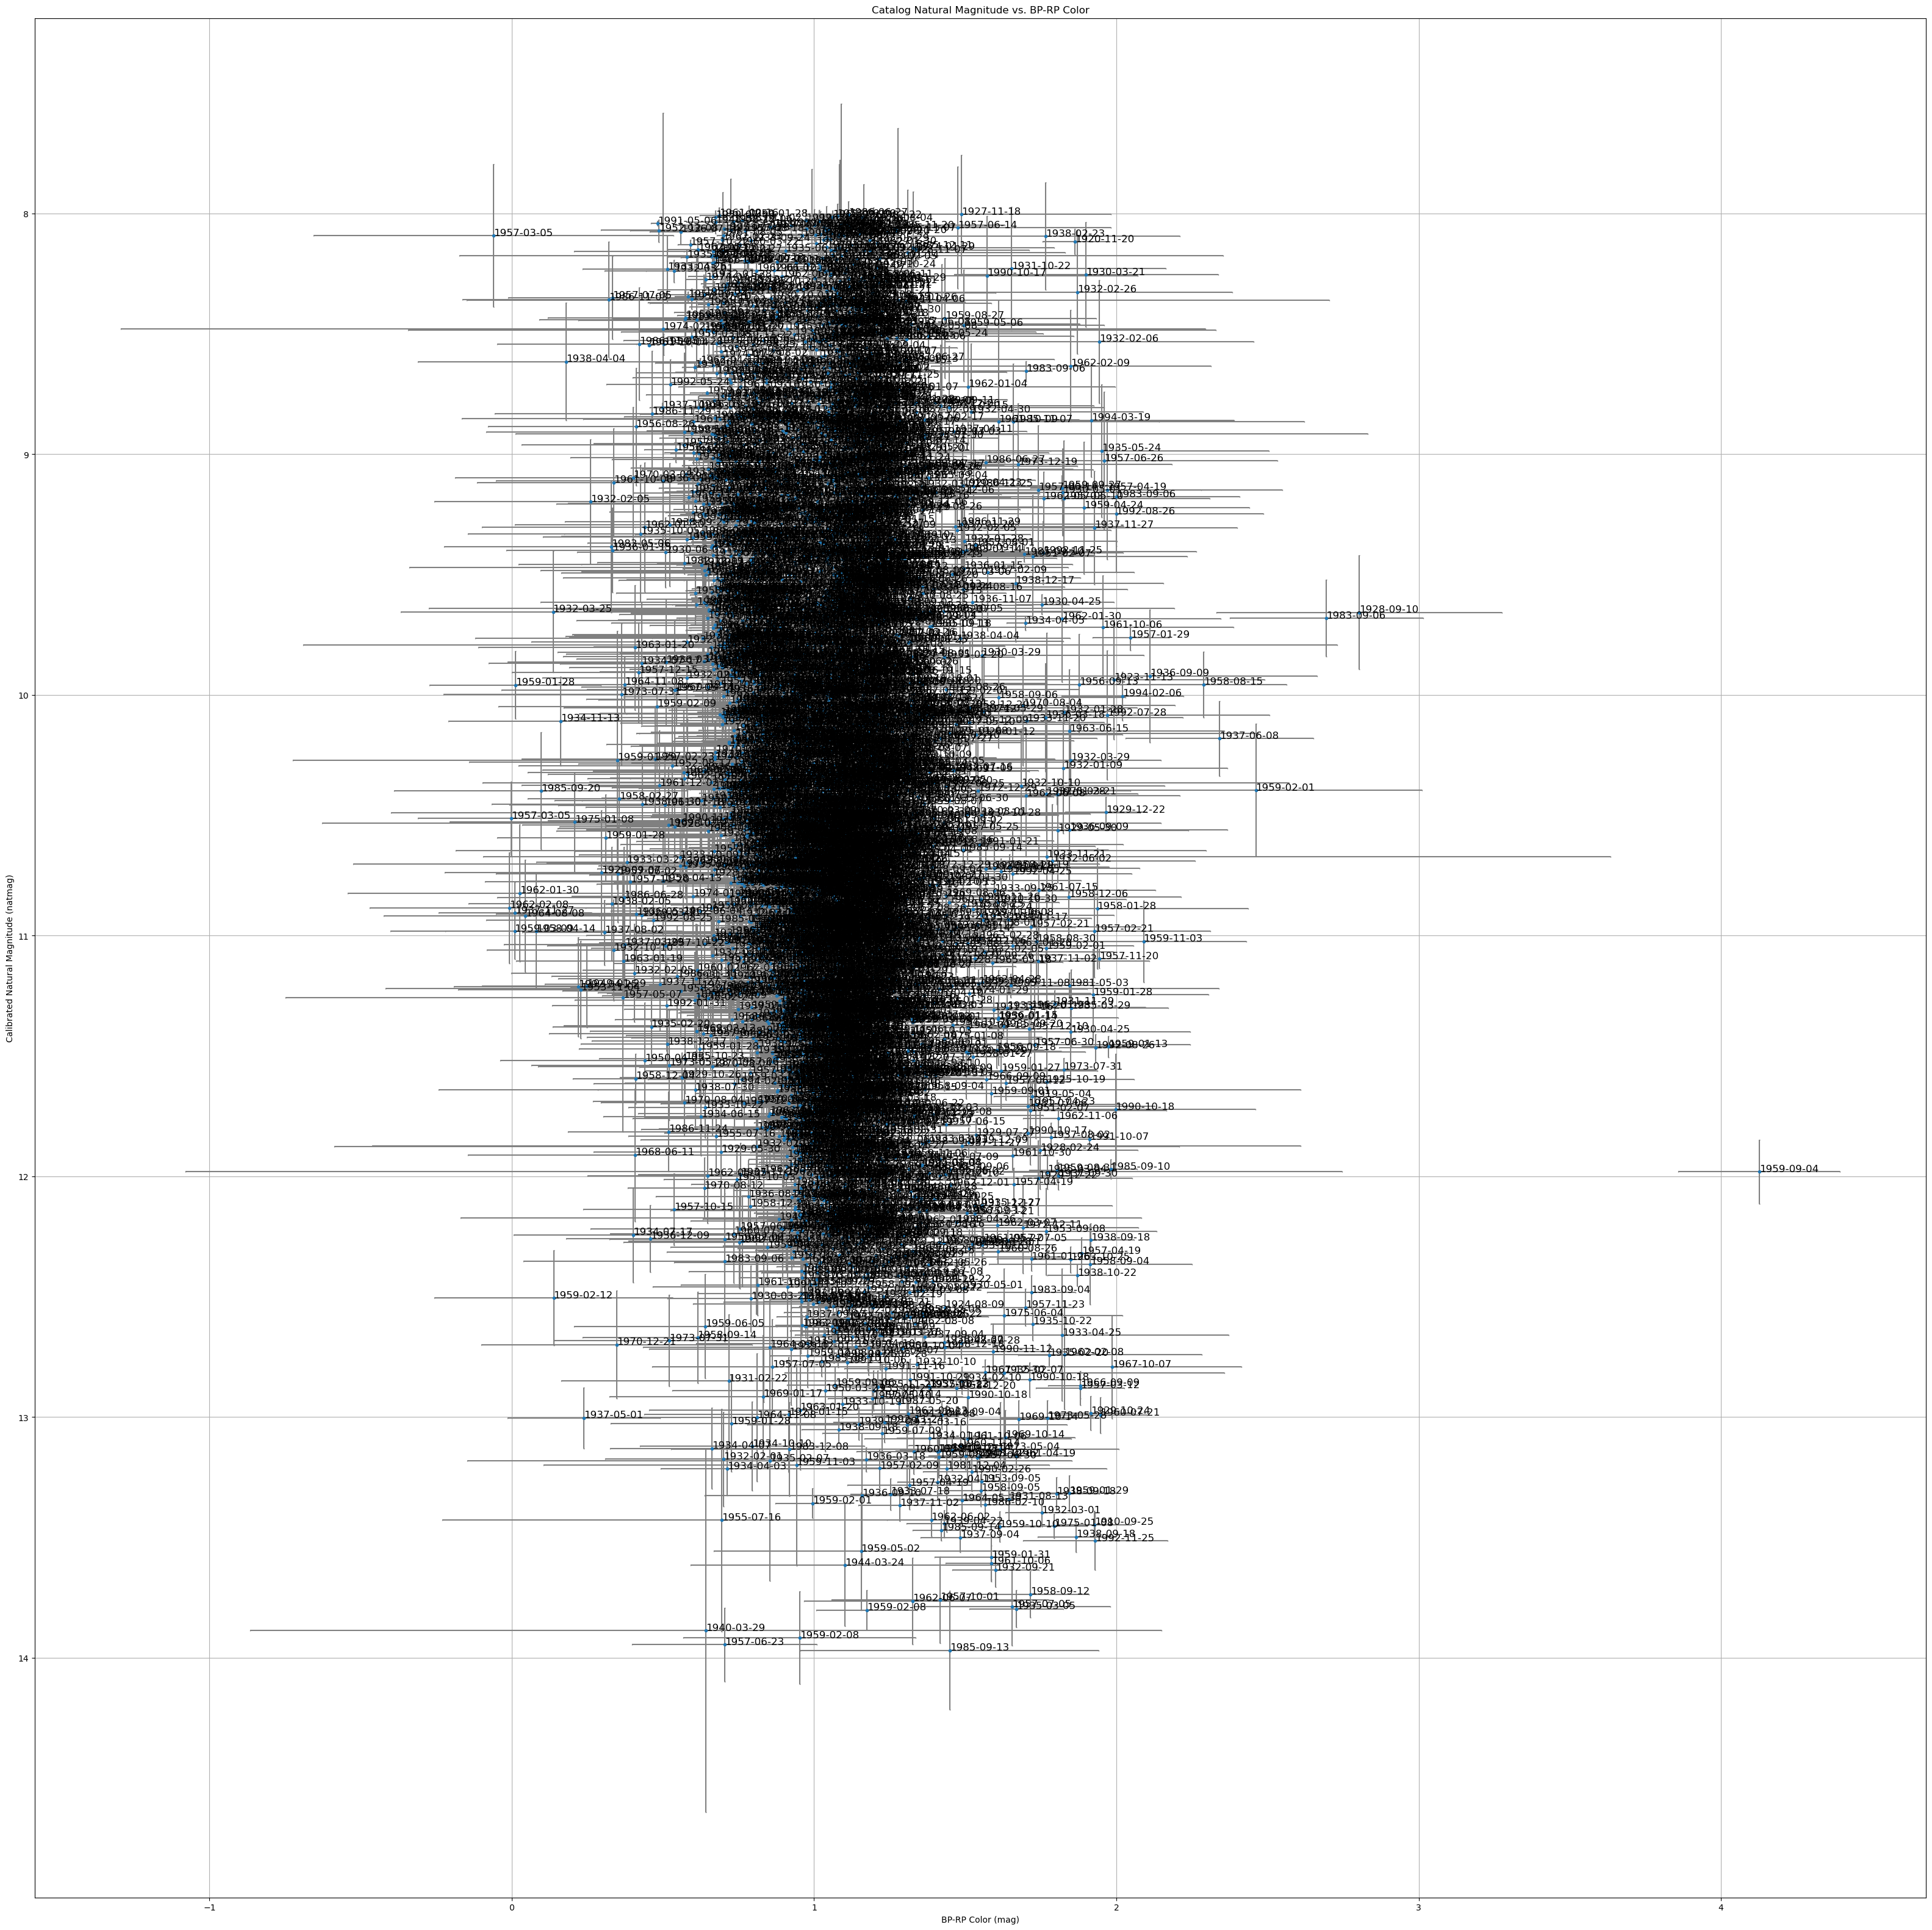

In [16]:
# Plot the data: 'bp_rp_color' on y-axis and 'natmag' on x-axis with 'bp_rp_error' as error bars
plt.figure(figsize=(40, 40))
# plt.scatter(unique_df['bp_rp_color'], unique_df['natmag'], s=5)
plt.errorbar(unique_df['bp_rp_color'], unique_df['natmag'], 
             xerr=unique_df['bp_rp_error']/2, yerr=np.abs(unique_df['natmag_error'])/2, 
             fmt='.', ecolor='grey', capsize=1)

# print(unique_df)
# print(new_df)

# # Ensure both DataFrames have the same index
# unique_df = unique_df.reset_index(drop=True)
# new_df = new_df.reset_index(drop=True)

# Annotate the points with date_orig
for i, row in new_df.iterrows():
    plt.annotate(row['date_orig'], (unique_df.loc[i, 'bp_rp_color'], unique_df.loc[i, 'natmag']), fontsize=12)

# Customize the plot
plt.gca().invert_yaxis()
plt.ylabel('Calibrated Natural Magnitude (natmag)')
plt.xlabel('BP-RP Color (mag)')
plt.title('Catalog Natural Magnitude vs. BP-RP Color')
plt.grid(True)

plt.show()

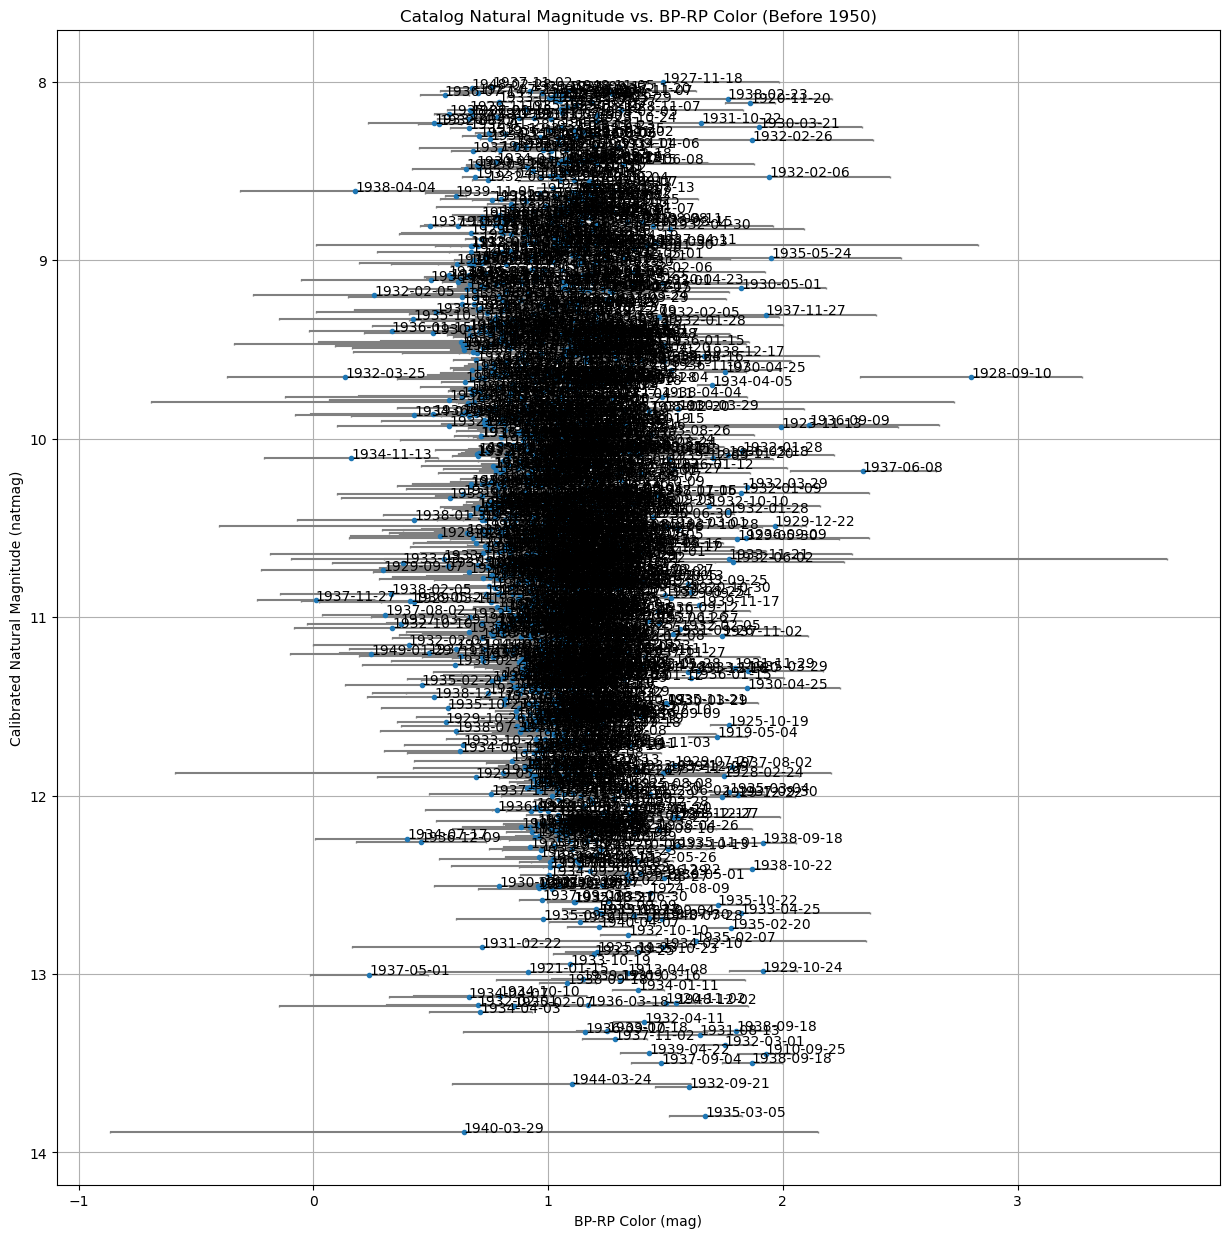

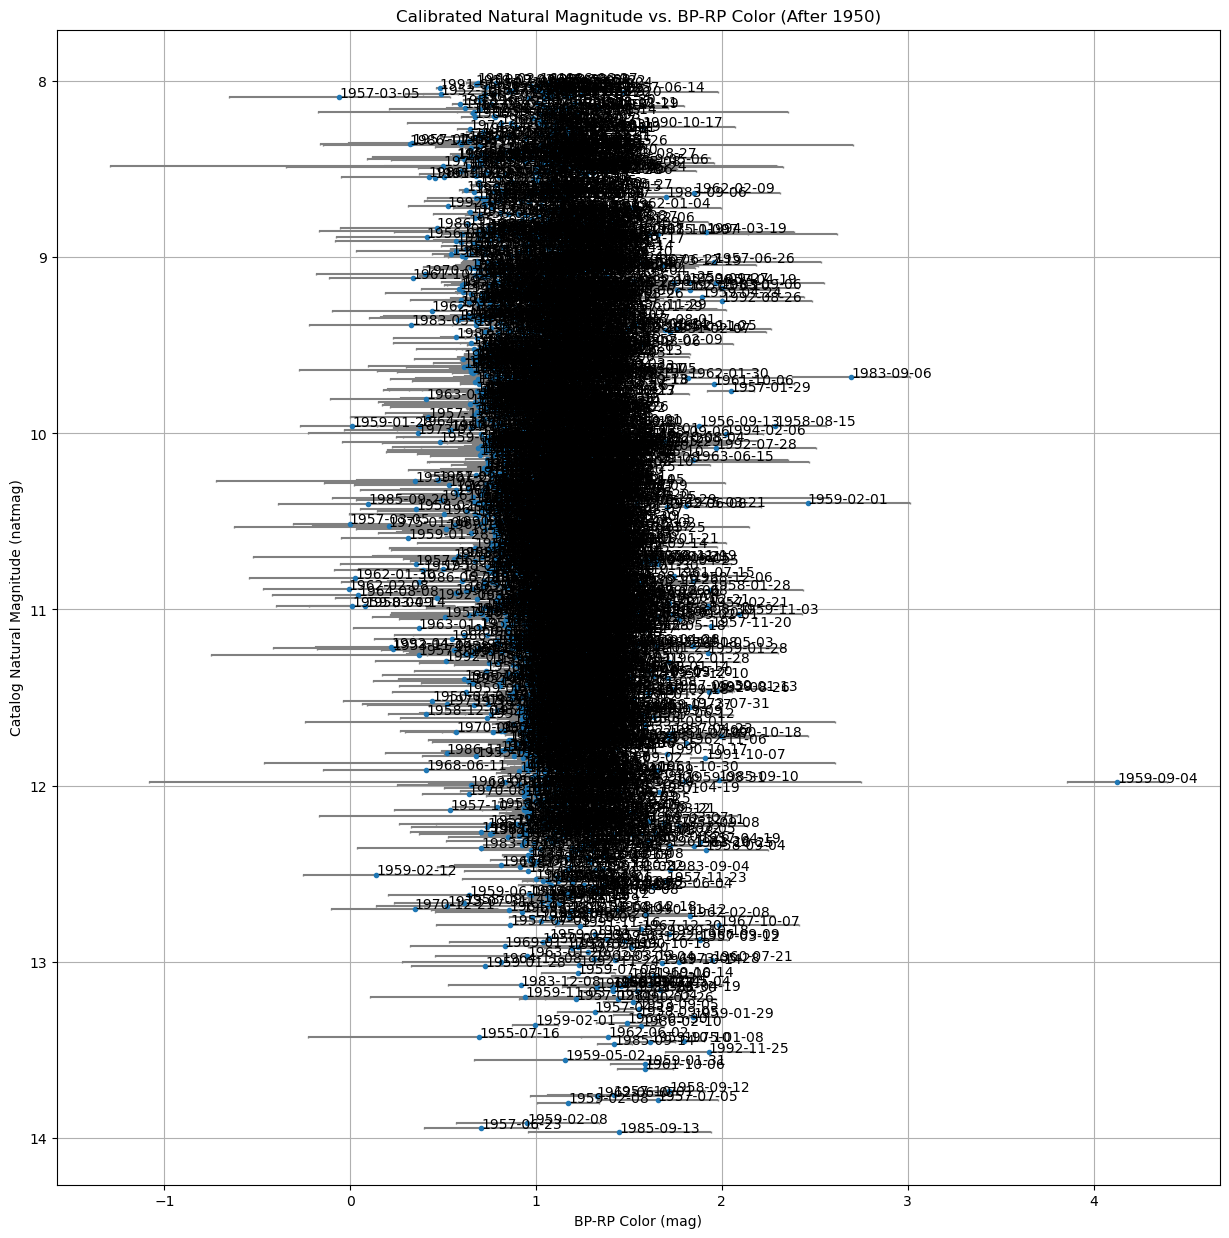

In [17]:
import matplotlib.pyplot as plt

# Filter new_df based on date_orig
before_1950_df = new_df[new_df['date_orig'] < '1950-01-01']
after_1950_df = new_df[new_df['date_orig'] >= '1950-01-01']

# Plot for data points before 1950
plt.figure(figsize=(15, 15))
plt.errorbar(unique_df.loc[before_1950_df.index, 'bp_rp_color'], unique_df.loc[before_1950_df.index, 'natmag'], 
             xerr=unique_df.loc[before_1950_df.index, 'bp_rp_error']/2, 
             fmt='.', ecolor='grey', capsize=1)

# Annotate with date_orig
for index, row in before_1950_df.iterrows():
    plt.annotate(row['date_orig'], (unique_df.loc[index, 'bp_rp_color'], unique_df.loc[index, 'natmag']))

# Customize the plot
plt.gca().invert_yaxis()
plt.ylabel('Calibrated Natural Magnitude (natmag)')
plt.xlabel('BP-RP Color (mag)')
plt.title('Catalog Natural Magnitude vs. BP-RP Color (Before 1950)')
plt.grid(True)
plt.savefig('before_1950.jpeg')

plt.show()

# Plot for data points after 1950
plt.figure(figsize=(15, 15))
plt.errorbar(unique_df.loc[after_1950_df.index, 'bp_rp_color'], unique_df.loc[after_1950_df.index, 'natmag'], 
             xerr=unique_df.loc[after_1950_df.index, 'bp_rp_error']/2, 
             fmt='.', ecolor='grey', capsize=1)

# Annotate with date_orig
for index, row in after_1950_df.iterrows():
    plt.annotate(row['date_orig'], (unique_df.loc[index, 'bp_rp_color'], unique_df.loc[index, 'natmag']))

# Customize the plot
plt.gca().invert_yaxis()
plt.ylabel('Catalog Natural Magnitude (natmag)')
plt.xlabel('BP-RP Color (mag)')
plt.title('Calibrated Natural Magnitude vs. BP-RP Color (After 1950)')
plt.grid(True)
plt.savefig('after_1950.jpeg')

plt.show()

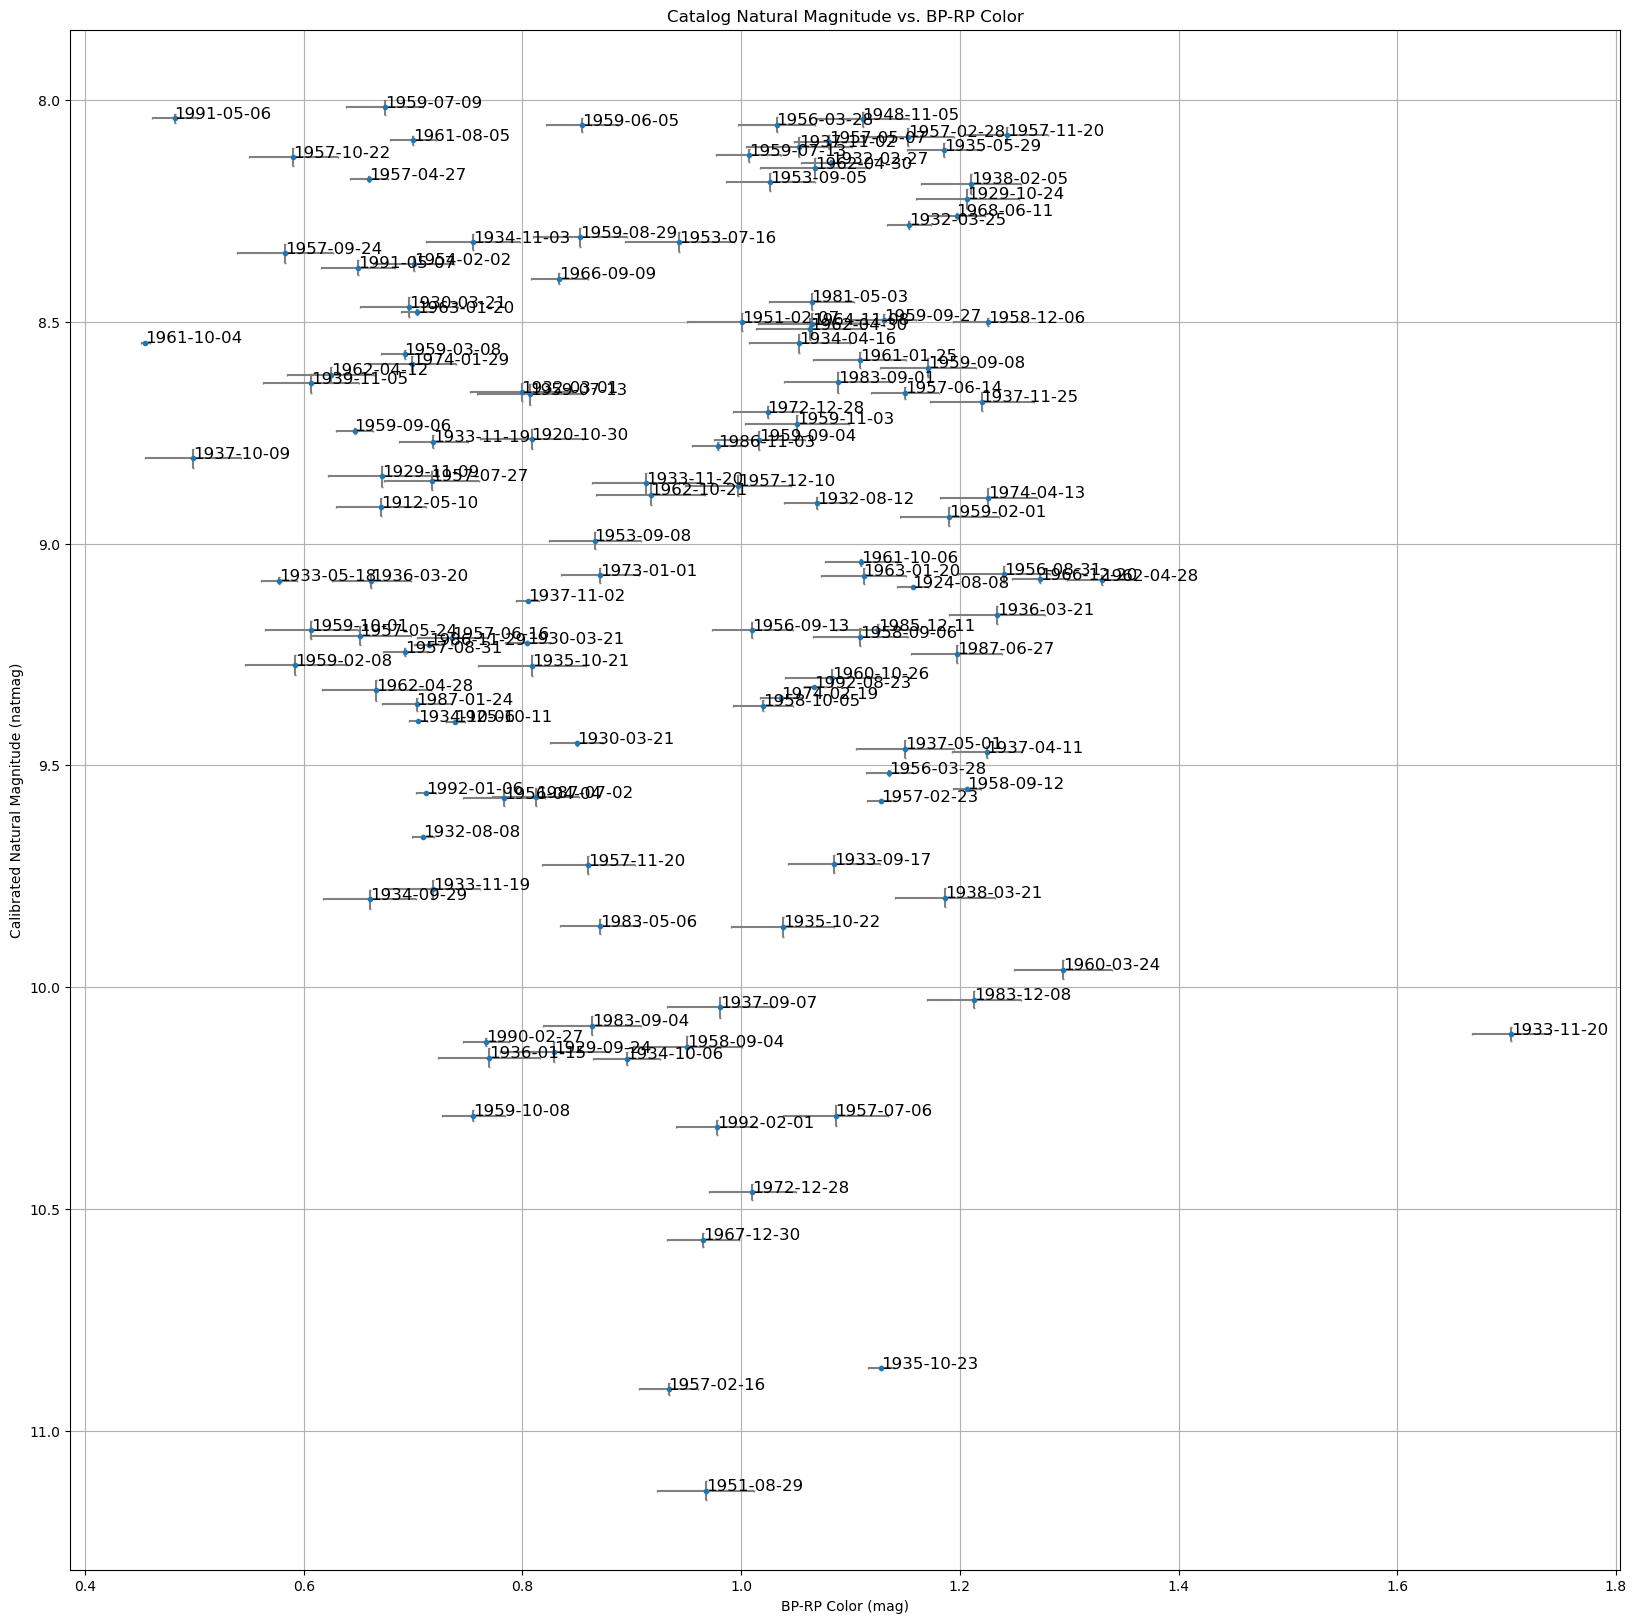

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming unique_df and new_df are already defined DataFrames

# Filter the DataFrame based on error criteria
filtered_df = unique_df[(unique_df['bp_rp_error'] <= 0.1) & (unique_df['natmag_error'] <= 0.1)]
filtered_new_df = new_df[(unique_df['bp_rp_error'] <= 0.1) & (unique_df['natmag_error'] <= 0.1)]

# Plot the data
plt.figure(figsize=(20, 20))
plt.errorbar(filtered_df['bp_rp_color'], filtered_df['natmag'], 
             xerr=filtered_df['bp_rp_error']/2, yerr=np.abs(filtered_df['natmag_error'])/2, 
             fmt='.', ecolor='grey', capsize=1)

# Annotate the points with date_orig
for i, row in filtered_new_df.iterrows():
    plt.annotate(row['date_orig'], (filtered_df.loc[i, 'bp_rp_color'], filtered_df.loc[i, 'natmag']), fontsize=12)

# Customize the plot
plt.gca().invert_yaxis()
plt.ylabel('Calibrated Natural Magnitude (natmag)')
plt.xlabel('BP-RP Color (mag)')
plt.title('Catalog Natural Magnitude vs. BP-RP Color')
plt.grid(True)

plt.show()

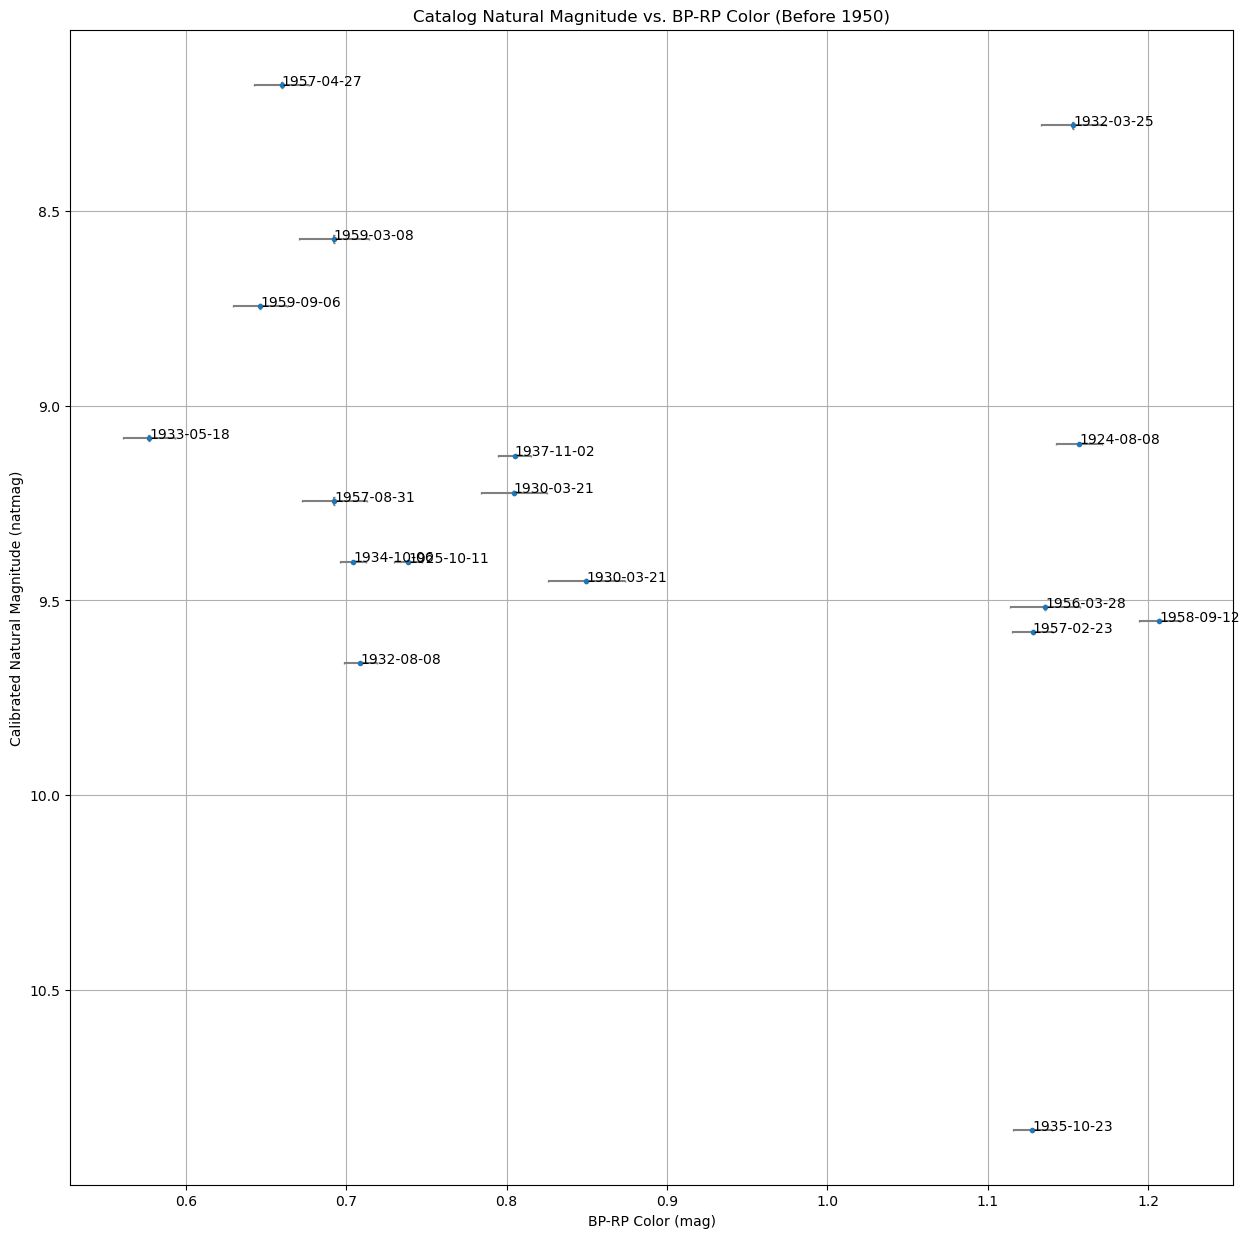

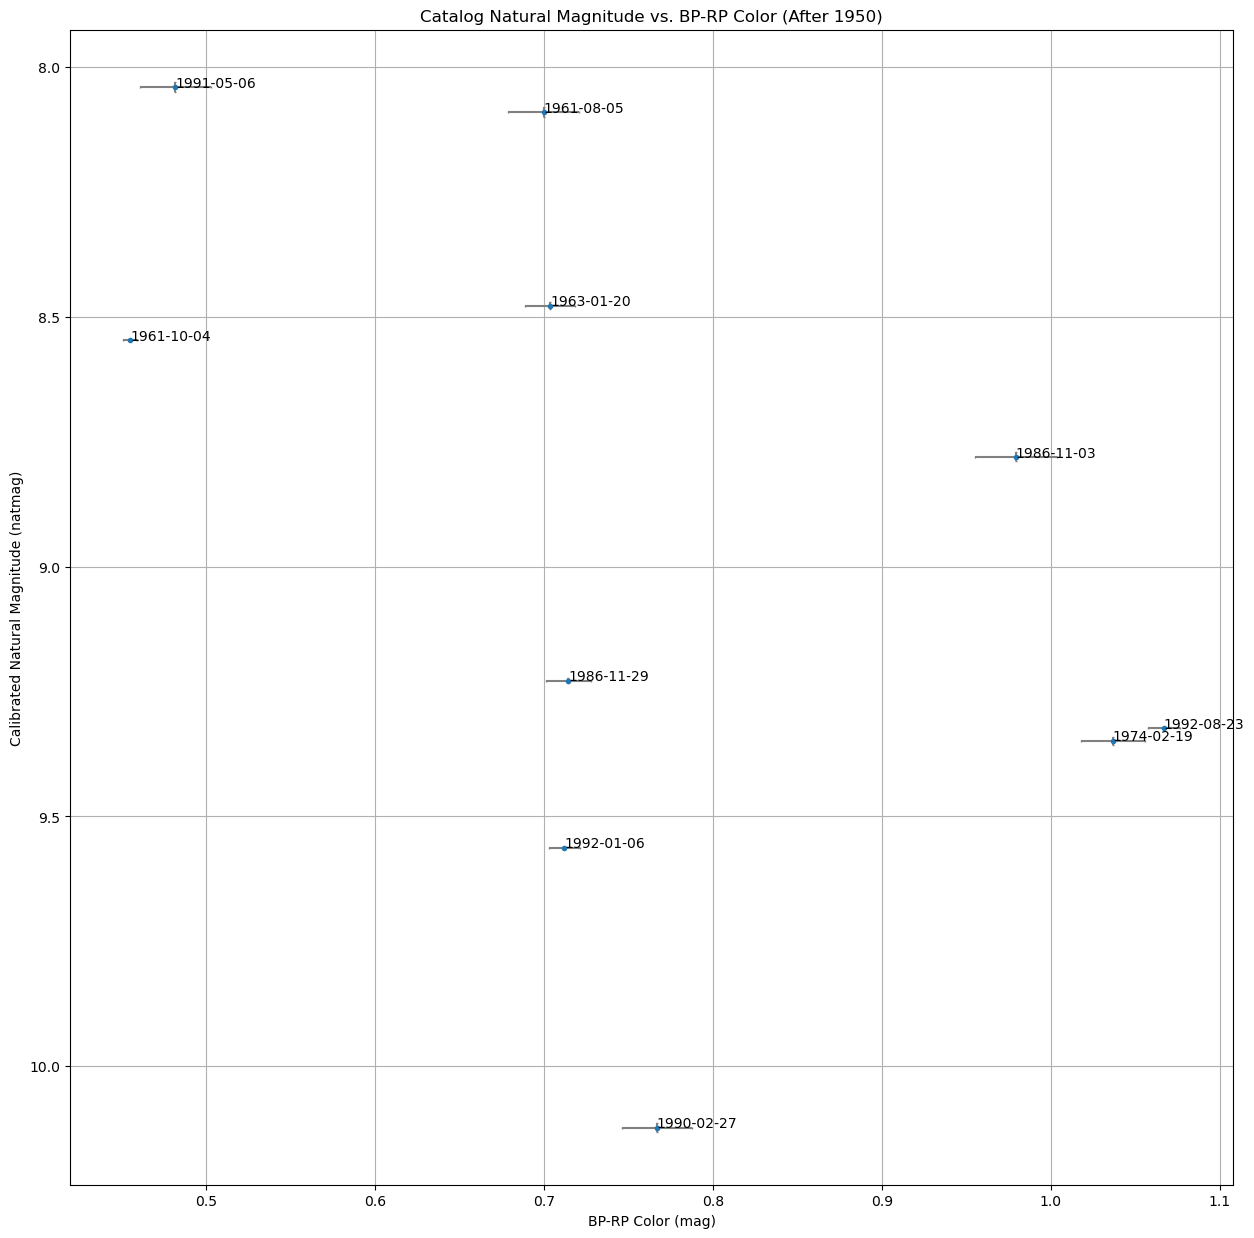

In [19]:
import matplotlib.pyplot as plt

# Filter unique_df based on error criteria
filtered_unique_df = unique_df[(unique_df['bp_rp_error'] <= 0.05) & (unique_df['natmag_error'] <= 0.05)]

# Filter new_df based on error criteria to match indices with filtered_unique_df
filtered_new_df = new_df[(unique_df['bp_rp_error'] <= 0.05) & (unique_df['natmag_error'] <= 0.05)]

# Further filter new_df based on date_orig
before_1960_df = filtered_new_df[filtered_new_df['date_orig'] < '1960-01-01']
after_1960_df = filtered_new_df[filtered_new_df['date_orig'] >= '1960-01-01']

# Plot for data points before 1960
plt.figure(figsize=(15, 15))
plt.errorbar(filtered_unique_df.loc[before_1960_df.index, 'bp_rp_color'], filtered_unique_df.loc[before_1960_df.index, 'natmag'], 
             xerr=filtered_unique_df.loc[before_1960_df.index, 'bp_rp_error']/2, 
             yerr=np.abs(filtered_unique_df.loc[before_1960_df.index, 'natmag_error'])/2,
             fmt='.', ecolor='grey', capsize=1)

# Annotate with date_orig
for index, row in before_1960_df.iterrows():
    plt.annotate(row['date_orig'], (filtered_unique_df.loc[index, 'bp_rp_color'], filtered_unique_df.loc[index, 'natmag']))

# Customize the plot
plt.gca().invert_yaxis()
plt.ylabel('Calibrated Natural Magnitude (natmag)')
plt.xlabel('BP-RP Color (mag)')
plt.title('Catalog Natural Magnitude vs. BP-RP Color (Before 1950)')
plt.grid(True)
plt.savefig('before_1960.jpeg')

plt.show()

# Plot for data points after 1960
plt.figure(figsize=(15, 15))
plt.errorbar(filtered_unique_df.loc[after_1960_df.index, 'bp_rp_color'], filtered_unique_df.loc[after_1960_df.index, 'natmag'], 
             xerr=filtered_unique_df.loc[after_1960_df.index, 'bp_rp_error']/2, 
             yerr=np.abs(filtered_unique_df.loc[after_1960_df.index, 'natmag_error'])/2,
             fmt='.', ecolor='grey', capsize=1)

# Annotate with date_orig
for index, row in after_1960_df.iterrows():
    plt.annotate(row['date_orig'], (filtered_unique_df.loc[index, 'bp_rp_color'], filtered_unique_df.loc[index, 'natmag']))

# Customize the plot
plt.gca().invert_yaxis()
plt.ylabel('Calibrated Natural Magnitude (natmag)')
plt.xlabel('BP-RP Color (mag)')
plt.title('Catalog Natural Magnitude vs. BP-RP Color (After 1950)')
plt.grid(True)
plt.savefig('after_1960.jpeg')

plt.show()

In [20]:
import matplotlib.pyplot as plt

# Filter unique_df based on error criteria
filtered_unique_df = unique_df[(unique_df['bp_rp_error'] <= 0.05) & (unique_df['natmag_error'] <= 0.05)]

# Filter new_df based on error criteria to match indices with filtered_unique_df
filtered_new_df = new_df[(unique_df['bp_rp_error'] <= 0.05) & (unique_df['natmag_error'] <= 0.05)]

# Further filter new_df based on date_orig
before_1960_df = filtered_new_df[filtered_new_df['date_orig'] < '1960-01-01']

# Print the corresponding rows from unique_df for data points before 1960
rows_before_1960_1 = filtered_unique_df.loc[before_1960_df.index]
rows_before_1960_2 = filtered_new_df.loc[before_1960_df.index]

In [22]:
rows_before_1960_1['natmag'].values

array([ 9.09766102, 10.85945129,  8.28134251,  9.22394371,  9.45030785,
        9.58093929,  9.51764393,  8.17796993,  8.57322025,  9.24481487,
        9.40098953,  9.40182209,  9.66102314,  9.08369923,  8.74522495,
        9.55249214,  9.12904263])

In [34]:
# Define a function to calculate B and R
def calculate_B_and_R(natural_magnitudes, color_term):
    B_values = []
    R_values = []

    for m_n in natural_magnitudes:
        # Calculate B
        B = m_n / (1 + color_term)
        
        # Calculate R
        R = B - (m_n - B) / color_term
        
        B_values.append(B)
        R_values.append(R)
    
    return B_values, R_values

# Example data
natural_magnitudes = [9.4]
color_term = 0.3  # Example color term, replace with actual value

# Calculate B and R for the given data
B_values, R_values = calculate_B_and_R(natural_magnitudes, color_term)

# Output the results
for i, (B, R) in enumerate(zip(B_values, R_values)):
    print(f"Star {i+1}:")
    print(f"  Natural Magnitude: {natural_magnitudes[i]}")
    print(f"  B (Blue Magnitude): {B}")
    print(f"  R (Red Magnitude): {R}\n")

Star 1:
  Natural Magnitude: 9.4
  B (Blue Magnitude): 7.230769230769231
  R (Red Magnitude): -8.881784197001252e-16



In [45]:
rows_before_1960_2['source_id'].values

array(['40014910013466', '40051760048940', '40960060027189',
       '40032490102656', '40032530046051', '40606650003109',
       '40346880023977', '40608740002389', '40630210005559',
       '40615430011840', '40049190019954', '40017460018270',
       '40966670020382', '40979370028580', '40356020079351',
       '40625930022151', '40059380085447'], dtype=object)

In [21]:
%pwd

"/home/dutta/Downloads/Summer'24/Parts"

In [39]:
import pandas as pd
from astroquery.gaia import Gaia

# Step 1: Load the .csv file and extract 'gaiaedr3_id' where it's not empty
csv_file_path = 'download.csv'  # Update with your file path
df = pd.read_csv(csv_file_path)

# Filter out rows where 'gaiaedr3_id' is not empty
gaia_ids = df['gaiaedr3_id'].dropna().astype(int).tolist()

# Function to run the query in batches
def query_gaia(ids_batch):
    ids_str = ', '.join(map(str, ids_batch))
    query = f"""
    SELECT *
    FROM gaiadr3.gaia_source
    WHERE source_id IN ({ids_str})
        AND teff_gspphot BETWEEN 5000 AND 6000
        AND phot_variable_flag = 'NOT_AVAILABLE'
        AND phot_g_mean_flux_over_error > 100
        AND phot_rp_mean_flux_over_error > 40
        AND phot_bp_mean_flux_over_error > 40
    """
    job = Gaia.launch_job_async(query)
    return job.get_results().to_pandas()

# Step 2: Query in batches
batch_size = 1000  # Adjust batch size if needed
results_list = []

for i in range(0, len(gaia_ids), batch_size):
    batch = gaia_ids[i:i + batch_size]
    try:
        results_list.append(query_gaia(batch))
    except Exception as e:
        print(f"Error querying batch {i // batch_size + 1}: {e}")

# Combine all results into a single DataFrame
if results_list:
    all_results = pd.concat(results_list, ignore_index=True)

    # Step 3: Sort by stability criteria and select top 200 most stable stars
    sorted_results = all_results.sort_values(
        by=['phot_g_mean_flux_over_error', 'phot_rp_mean_flux_over_error', 'phot_bp_mean_flux_over_error'],
        ascending=False
    ).head(200)

    # Display the results
    print(sorted_results)
else:
    print("No results returned from the query.")

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
              solution_id                   DESIGNATION            SOURCE_ID  \
6     1636148068921376768   Gaia DR3 384433146753426816   384433146753426816   
922   1636148068921376768   Gaia DR3 384433146753426816   384433146753426816   
557   1636148068921376768   Gaia DR3 393317200706971264   393317200706971264   
1114  1636148068921376768   Gaia DR3 393317200706971264   393317200706971264   
514   1636148068921376768   Gaia DR3 387209791571053056   387209791571053056   
...                   ...                           ...               

In [40]:
sorted_results

solution_id                   DESIGNATION            SOURCE_ID  \
6     1636148068921376768   Gaia DR3 384433146753426816   384433146753426816   
922   1636148068921376768   Gaia DR3 384433146753426816   384433146753426816   
557   1636148068921376768   Gaia DR3 393317200706971264   393317200706971264   
1114  1636148068921376768   Gaia DR3 393317200706971264   393317200706971264   
514   1636148068921376768   Gaia DR3 387209791571053056   387209791571053056   
...                   ...                           ...                  ...   
164   1636148068921376768  Gaia DR3 1925727343982204416  1925727343982204416   
644   1636148068921376768  Gaia DR3 1925727343982204416  1925727343982204416   
281   1636148068921376768  Gaia DR3 1925849046175846912  1925849046175846912   
653   1636148068921376768  Gaia DR3 1925849046175846912  1925849046175846912   
693   1636148068921376768  Gaia DR3 1939777723896889344  1939777723896889344   

      random_index  ref_epoch          ra  ra_error        dec  dec_error  \
6       1500011920     2016.0    0.387661  0.009715  42.585433   0.007422   
922     1500011920     2016.0    0.387661  0.009715  42.585433   0.007422   
557      274483921     2016.0    0.031702  0.007354  48.316518   0.009045   
1114     274483921     2016.0    0.031702  0.007354  48.316518   0.009045   
514      595314268     2016.0    1.221780  0.023907  47.140525   0.020673   
...            ...        ...         ...       ...        ...        ...   
164     1148943713     2016.0  356.261044  0.010712  43.906561   0.007232   
644     1148943713     2016.0  356.261044  0.010712  43.906561   0.007232   
281     1456061502     2016.0  356.744247  0.008259  44.808324   0.006282   
653     1456061502     2016.0  356.744247  0.008259  44.808324   0.006282   
693      352582901     2016.0  358.079842  0.006813  48.652471   0.006987   

      parallax  ...  azero_gspphot  azero_gspphot_lower  azero_gspphot_upper  \
6     2.448538  ...         0.5362               0.5341               0.5382   
922   2.448538  ...         0.5362               0.5341               0.5382   
557   0.981866  ...         0.5028               0.4968               0.5087   
1114  0.981866  ...         0.5028               0.4968               0.5087   
514   0.908077  ...         0.5029               0.4981               0.5086   
...        ...  ...            ...                  ...                  ...   
164   4.838909  ...         0.1238               0.1197               0.1367   
644   4.838909  ...         0.1238               0.1197               0.1367   
281   2.767073  ...         0.1993               0.1966               0.2030   
653   2.767073  ...         0.1993               0.1966               0.2030   
693   2.109338  ...         0.1621               0.1539               0.1685   

      ag_gspphot  ag_gspphot_lower  ag_gspphot_upper  ebpminrp_gspphot  \
6         0.4329            0.4312            0.4346            0.2316   
922       0.4329            0.4312            0.4346            0.2316   
557       0.4029            0.3979            0.4076            0.2130   
1114      0.4029            0.3979            0.4076            0.2130   
514       0.3971            0.3932            0.4016            0.2103   
...          ...               ...               ...               ...   
164       0.1024            0.0990            0.1131            0.0549   
644       0.1024            0.0990            0.1131            0.0549   
281       0.1673            0.1651            0.1704            0.0901   
653       0.1673            0.1651            0.1704            0.0901   
693       0.1374            0.1304            0.1429            0.0743   

      ebpminrp_gspphot_lower  ebpminrp_gspphot_upper  libname_gspphot  
6                     0.2307                  0.2326            MARCS  
922                   0.2307                  0.2326            MARCS  
557                   0.2103                  0.2155          

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Load the .csv file
csv_file_path = 'download.csv'  # Update with your file path
csv_df = pd.read_csv(csv_file_path)

# Load the DataFrame sorted_results (assuming it's already created)
# For demonstration, let's create a dummy sorted_results DataFrame
sorted_results = sorted_results

# Merge the DataFrame on gaiaedr3_id / SOURCE_ID
merged_df = pd.merge(sorted_results, csv_df, left_on='SOURCE_ID', right_on='gaiaedr3_id')

# Filter relevant columns
relevant_columns = ['SOURCE_ID', 'bp_rp', 'phot_bp_mean_mag', 'phot_rp_mean_mag', 'natmag', 'natmag_error']
merged_df = merged_df[relevant_columns]

# Remove rows with any empty values
merged_df = merged_df.dropna()

# Extract necessary data
gaia_ids = merged_df['SOURCE_ID']
B_minus_V = merged_df['bp_rp']
V = merged_df['natmag']
V_error = merged_df['natmag_error']
B = merged_df['phot_bp_mean_mag']
R = merged_df['phot_rp_mean_mag']
# B_error = merged_df['phot_bp_mean_mag_error']
# R_error = merged_df['phot_bp_mean_mag_error']

In [60]:
type(B)

pandas.core.series.Series

In [42]:
import numpy as np
# import matplotlib.pyplot as plt
import statsmodels.api as sm

# Given data (replace with your actual data)
B = B.values
R = R.values
V = V.values

# Compute the (B - R) term
BR = B - R

# Compute the square of the (B - R) term
BR_squared = BR ** 2

# Combine the predictors
X = np.column_stack((BR, BR_squared))

# Add a constant term to the predictors
X = sm.add_constant(X)

# Fit the quadratic model
model = sm.OLS(V, X).fit()

# Extract the parameters
intercept = model.params[0]
C1 = model.params[1]  # Coefficient of (B - R)
C2 = model.params[2]  # Coefficient of (B - R)^2

print(f"Fitted value of C1: {C1}")
print(f"Fitted value of C2: {C2}")
print(f"Model summary:\n{model.summary()}")

Fitted value of C1: -1.6142225271702948
Fitted value of C2: 0.5976851816737807
Model summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8689
Date:                Fri, 14 Jun 2024   Prob (F-statistic):              0.420
Time:                        12:52:20   Log-Likelihood:                -545.13
No. Observations:                 377   AIC:                             1096.
Df Residuals:                     374   BIC:                             1108.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [61]:
# Remove rows with empty values in 'gaiaedr3_id', 'natmag', 'natmag_error'
csv_df.dropna(subset=['gaiaedr3_id', 'natmag', 'natmag_error'], inplace=True)

# Remove rows with empty values in 'SOURCE_ID', 'bp_rp', 'bp', 'rp', 'bp_error', 'rp_error' in the DataFrame
sorted_results.dropna(subset=['SOURCE_ID', 'bp_rp', 'phot_bp_mean_mag', 'phot_rp_mean_mag'], inplace=True)

# Merge the DataFrame and CSV on the Gaia ID
merged_df = pd.merge(sorted_results, csv_df, left_on='SOURCE_ID', right_on='gaiaedr3_id')

# Calculate the color term C for the given set of data
def calculate_color_term(bp, rp, natmag):
    color_term = np.polyfit(bp - rp, natmag, 1)[0]
    return color_term

# Derive the best-fit color term for the dataset
C_best = calculate_color_term(merged_df['phot_bp_mean_mag'], merged_df['phot_rp_mean_mag'], merged_df['natmag'])
C_best = 1.717961

# Define a function to calculate GBP - GRP for a given value of natmag
def calculate_color_index(natmag, GRP, C_best):
    return (natmag - GRP) / C_best

# Example natmag value for which we want to calculate GBP - GRP
example_natmag = 9.097661

# Assuming we have a representative value for GRP from the data (e.g., the mean or median)
GRP_example = merged_df['phot_rp_mean_mag'].mean()  # Using mean GRP for illustration

# Calculate GBP - GRP for the given natmag value
color_index = calculate_color_index(example_natmag, GRP_example, C_best)
print(f"GBP - GRP for natmag {example_natmag}: {color_index}")

# Verify the calculation by recalculating natmag from GBP and GRP
GBP_example = GRP_example + color_index  # This assumes GBP_example = GRP_example + (GBP - GRP)
recalculated_natmag = GRP_example + C_best * (GBP_example - GRP_example)
print(f"Recalculated natmag: {recalculated_natmag}")

GBP - GRP for natmag 9.097661: -0.27024014342501007
Recalculated natmag: 9.097661


In [22]:
# Load gaiaedr3_to_plates.txt file
with open('gaiaedr3_to_plates.txt', 'r') as file:
    gaia_to_plates_data = json.load(file)

# print(gaia_to_plates_data)

# Load unique_plate_detailsd.txt file
with open('unique_plate_details.txt', 'r') as file:
    plate_details_data = json.load(file)

# Create a dictionary to map plate_id to date_orig
plate_id_to_date_orig = {str(item['plate_id']): item['date_orig'] for item in plate_details_data}

# print(plate_id_to_date_orig)

# Extract plate_id for each source_id from gaiaedr3_to_plates_selected.txt
source_id_to_plate_id = {str(plate['source_id']): str(plate['plate_id']) for gaia_id in gaia_to_plates_data.values() for plate in gaia_id if str(plate['source_id']) in final_df['source_id'].astype(str).values}

# Get date_orig for each plate_id
date_orig_list = [plate_id_to_date_orig.get(plate_id, 'Unknown') for plate_id in source_id_to_plate_id.values()]

# Create a new DataFrame with source_id, plate_id, and date_orig
ultra_new_df = pd.DataFrame({
    'source_id': list(source_id_to_plate_id.keys()),
    'plate_id': list(source_id_to_plate_id.values()),
    'date_orig': date_orig_list
})

print(ultra_new_df)

KeyboardInterrupt: 

In [ ]:
import pandas as pd

# Assuming ultra_new_df is already defined

# Convert date_orig to datetime format
ultra_new_df['date_orig'] = pd.to_datetime(ultra_new_df['date_orig'])

# Filter data between 1915 and 1925
filtered_ultra_new_df = ultra_new_df[(ultra_new_df['date_orig'] >= '1915-01-01') & (ultra_new_df['date_orig'] <= '1925-12-31')]

# Print the new DataFrame
print(filtered_ultra_new_df)

In [ ]:
source_ids = filtered_ultra_new_df['source_id'].tolist()
print(source_ids)

In [ ]:
import json

# Function to read JSON data from a file
def read_json_from_file(file_path):
    with open(file_path, 'r') as file:
        data = file.read()
    return json.loads(data)

# Function to get plate_ids for given source_ids
def get_plate_ids(data, source_ids_to_find):
    plate_ids = []
    for key, records in data.items():
        for record in records:
            if record['source_id'] in source_ids_to_find:
                plate_ids.append(record['plate_id'])
    # return list(set(plate_ids))  # Remove duplicates
    return plate_ids

# Path to the .txt file
file_path = 'gaiaedr3_to_plates.txt'

# Convert source_ids to integers
source_ids = list(map(int, source_ids))

# Read the JSON data from the file
data = read_json_from_file(file_path)

# Get the unique plate_ids for the given source_ids
unique_plate_ids = get_plate_ids(data, source_ids)

# Print the result
print(unique_plate_ids)

In [ ]:
import json

# Load the JSON data from the second text file
with open('unique_plate_details.txt', 'r') as file:
    plates_data = json.load(file)

# Extract date_orig for each plate_id
date_orig_dict = {}

for plate in plates_data:
    if plate['plate_id'] in unique_plate_ids:
        date_orig_dict[plate['plate_id']] = plate['date_orig']

# Print the results
print(date_orig_dict)